Data Preprocessing steps

In [ ]:
import zipfile
import os

zip_path = '/content/data.zip'
extract_folder = 'extracted_data'

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("Files extracted to:", extract_folder)


Files extracted to: extracted_data


Loading Data files and features

In [ ]:
from scipy.io import arff
import pandas as pd
import os

def load_arff_files_from_directory(directory):
    all_data = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.arff'):
                file_path = os.path.join(root, file)
                data, meta = arff.loadarff(file_path)
                df = pd.DataFrame(data)
                # Convert byte strings to strings if necessary
                df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
                all_data.append(df)
    return pd.concat(all_data, ignore_index=True)

# Path to the directory where the data was extracted
base_directory = '/content/extracted_data'

# Load all ARFF files
combined_data = load_arff_files_from_directory(base_directory)
print("Combined data shape:", combined_data.shape)
print(combined_data.columns)

Combined data shape: (75099, 93)
Index(['"ACTIVITY"', '"X0"', '"X1"', '"X2"', '"X3"', '"X4"', '"X5"', '"X6"',
       '"X7"', '"X8"', '"X9"', '"Y0"', '"Y1"', '"Y2"', '"Y3"', '"Y4"', '"Y5"',
       '"Y6"', '"Y7"', '"Y8"', '"Y9"', '"Z0"', '"Z1"', '"Z2"', '"Z3"', '"Z4"',
       '"Z5"', '"Z6"', '"Z7"', '"Z8"', '"Z9"', '"XAVG"', '"YAVG"', '"ZAVG"',
       '"XPEAK"', '"YPEAK"', '"ZPEAK"', '"XABSOLDEV"', '"YABSOLDEV"',
       '"ZABSOLDEV"', '"XSTANDDEV"', '"YSTANDDEV"', '"ZSTANDDEV"', '"XVAR"',
       '"YVAR"', '"ZVAR"', '"XMFCC0"', '"XMFCC1"', '"XMFCC2"', '"XMFCC3"',
       '"XMFCC4"', '"XMFCC5"', '"XMFCC6"', '"XMFCC7"', '"XMFCC8"', '"XMFCC9"',
       '"XMFCC10"', '"XMFCC11"', '"XMFCC12"', '"YMFCC0"', '"YMFCC1"',
       '"YMFCC2"', '"YMFCC3"', '"YMFCC4"', '"YMFCC5"', '"YMFCC6"', '"YMFCC7"',
       '"YMFCC8"', '"YMFCC9"', '"YMFCC10"', '"YMFCC11"', '"YMFCC12"',
       '"ZMFCC0"', '"ZMFCC1"', '"ZMFCC2"', '"ZMFCC3"', '"ZMFCC4"', '"ZMFCC5"',
       '"ZMFCC6"', '"ZMFCC7"', '"ZMFCC8"', '"ZMFCC9"', '



### Scaling Numerical Columns with `StandardScaler` in Python

This Python code snippet demonstrates how to normalize or standardize numerical columns in a dataset using `StandardScaler` from the `scikit-learn` library. This process is crucial in many machine learning pipelines to ensure that numerical data contributes equally to the analysis, preventing features with larger scales from dominating how models learn.

#### Key Components:

1. **Import the Necessary Library**:
   - `from sklearn.preprocessing import StandardScaler`: Imports the `StandardScaler` class from `scikit-learn`, a powerful and flexible machine learning library in Python.

2. **Identifying Numerical Columns**:
   - `numerical_cols`: A list of column names that represent the numerical data within the dataset. These are the columns that will be standardized. It's crucial that these column names match exactly those in the dataset.

3. **Scaler Initialization**:
   - `scaler = StandardScaler()`: Creates an instance of the `StandardScaler`. This scaler removes the mean and scales each feature/variable to unit variance. This is particularly useful when features vary widely in magnitudes, units, and range.

4. **Applying the Scaler**:
   - `combined_data[numerical_cols] = scaler.fit_transform(combined_data[numerical_cols])`: This line does two things:
     - `fit`: Computes the mean and std to be used for later scaling based on the data passed to it.
     - `transform`: Scales the data using the previously computed mean and std. This standardization is applied directly to the specified columns in `combined_data`.

#### Benefits of Using `StandardScaler`:

- **Feature Scaling**: Standardization of datasets is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g., Gaussian with 0 mean and unit variance).
- **Model Performance**: Models often converge faster on scaled data.
- **Equal Contribution**: Ensures that all features contribute equally to model training, especially important in algorithms that compute distances between data points, like k-means clustering or k-NN.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns (e.g., assuming columns 'x', 'y', 'z' for sensor data)
numerical_cols = ['"XAVG"', '"YAVG"', '"ZAVG"']  # modify as per your actual data columns
scaler = StandardScaler()
combined_data[numerical_cols] = scaler.fit_transform(combined_data[numerical_cols])


In [ ]:
# Display the first few rows to check the scaled columns
print(combined_data[['"XAVG"', '"YAVG"', '"ZAVG"']].head())


     "XAVG"    "YAVG"    "ZAVG"
0  2.341735 -0.192620 -0.412032
1  2.366150 -0.236123 -0.400816
2  2.440319 -0.107482 -0.414872
3  2.437228 -0.092870 -0.438058
4  2.454564 -0.138713 -0.439178



### Encoding Categorical Labels with `LabelEncoder` in Python

This Python code snippet illustrates how to convert categorical column values into a numerical format using `LabelEncoder` from `scikit-learn`. Converting categorical data into numbers is essential for training machine learning models, as these models inherently require numerical input.

#### Key Components:

1. **Importing the Required Library**:
   - `from sklearn.preprocessing import LabelEncoder`: This line imports the `LabelEncoder` class from `scikit-learn`, which is widely used for encoding labels with a value between 0 and the number of classes minus one.

2. **Encoder Initialization**:
   - `encoder = LabelEncoder()`: Creates an instance of the `LabelEncoder`. This object can transform non-numerical labels (as long as they are hashable and comparable) into numerical labels.

3. **Applying the Encoder**:
   - `combined_data['Activity'] = encoder.fit_transform(combined_data['"ACTIVITY"'])`: Here, the `fit_transform` method of the encoder is applied to the 'ACTIVITY' column. This method first fits the encoder to the data by discovering all unique labels and then transforms the labels into corresponding numeric values. Adjust the column name `"ACTIVITY"` as per the actual name in your dataset.

4. **Verification of Encoding**:
   - `print("Encoded activities:", combined_data['Activity'].unique())`: After encoding, it's good practice to verify the transformation by checking the unique values of the newly created numeric column. This helps ensure that the encoding was successful and gives insight into the range of encoded values.

#### Benefits of Using `LabelEncoder`:

- **Data Simplification**: Encoding simplifies the data by replacing labels with a numerical equivalent, which is especially useful when handling nominal categorical data.
- **Model Compatibility**: Most machine learning algorithms require numerical input, and thus encoding categorical features allows these models to interpret the data correctly.
- **Efficiency**: Label encoding can sometimes be more memory efficient than one-hot encoding, especially when the categorical variable has many classes.



In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
combined_data['Activity'] = encoder.fit_transform(combined_data['"ACTIVITY"'])  # Adjust the column name as necessary

# Verify the encoding
print("Encoded activities:", combined_data['Activity'].unique())


Encoded activities: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]




### Initializing Q-Learning Parameters and Q-Table in Python

The following Python code snippet demonstrates the initialization process for the Q-learning parameters including the number of states, the number of actions, and the Q-table itself. This setup is foundational for implementing the Q-learning algorithm, which is used to find an optimal action-selection policy.


#### Key Components:

1. **Determining the Number of States**:
   - `num_states = combined_data.shape[0]`: This line calculates the number of states by counting the number of rows in the dataset `combined_data`. Each row corresponds to a unique state, which is a common approach in many machine learning scenarios, particularly in reinforcement learning where each situation or set of feature values is treated as a distinct state.

2. **Determining the Number of Actions**:
   - `num_actions = combined_data['Activity'].nunique()`: Here, the number of actions is determined by counting the number of unique values in the 'Activity' column of `combined_data`. Each unique activity represents a possible action that an agent can take in a given state.

3. **Initializing the Q-Table**:
   - `Q = np.zeros((num_states, num_actions))`: Initializes the Q-table with zeros. The Q-table is a two-dimensional array where each row corresponds to a state, and each column corresponds to an action. Initially, all Q-values are set to zero, implying no prior knowledge; these values will be updated during the training process as the agent learns from its experiences.

#### Benefits of Q-Table Initialization:

- **Simplicity**: Starting with a Q-table filled with zeros is a simple and clear starting point that indicates no initial preference for any action in any state.
- **Flexibility**: As the agent interacts with the environment and receives rewards for its actions, the Q-values are updated, allowing the strategy to evolve based on actual performance rather than assumptions.
- **Scalability**: This initialization method scales well with the size of the problem, as it directly depends on the number of states and actions, making it suitable for a wide range of applications.


In [ ]:
num_states = combined_data.shape[0]  # Each row is a unique state
num_actions = combined_data['Activity'].nunique()  # Number of unique activities

Q = np.zeros((num_states, num_actions))




### Explanation of Key Components

- **Q-Table Initialization**: The Q-table is a matrix where rows correspond to states and columns to actions. It's initialized with zeros, meaning no initial preference is given to any action in any state.

- **Learning Parameters**:
  - **Alpha (Learning Rate)**: Determines the weight given to new experiences compared with past Q-value estimations.
  - **Gamma (Discount Factor)**: Balances the importance of sooner versus later rewards.
  - **Epsilon (Exploration Rate)**: Dictates the likelihood of taking a random action, facilitating exploration of new strategies.

- **Learning Loop**:
  - **Episodes and States**: The outer loop runs through each training episode, and the inner loop processes each state within an episode.
  - **Action Selection**: Actions are chosen either at random (exploration) or by selecting the previously best-known action (exploitation).
  - **State Transition and Reward Simulation**: This code randomly simulates moving to the next state and receiving a reward, but in a real scenario, this would be determined by the actions' effects according to environment rules.
  - **Q-Value Update**: The Q-value for the state-action pair is updated based on the observed reward and the maximum Q-value for the next state, adjusted by the learning rate and discount factor.
  
- **Progress Monitoring**: Prints an update at every 100 episodes to show the progress of learning.

### Use Cases and Further Steps

This setup is typical for problems where you need an agent to learn how to navigate a space or make decisions to maximize some notion of cumulative reward. The randomness in state transitions and rewards here is a simplification and should be replaced with more realistic dynamics based on specific application scenarios, such as games, robotics navigation, or decision-making systems in finance or resource management.

This code forms a basic foundation for implementing reinforcement learning with Q-learning, and it can be expanded with more sophisticated state transition logic, a refined exploration strategy (e.g., decaying epsilon), and integration with actual environment dynamics.

In [ ]:
import numpy as np

# Initialize Q-table
num_states = combined_data.shape[0]
num_actions = len(np.unique(combined_data['Activity']))
Q = np.zeros((num_states, num_actions))

# Initialize parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate
num_episodes = 1000  # Total number of episodes
last_action = np.zeros(num_states, dtype=int)  # Last action taken for each state

for episode in range(num_episodes):
    for state in range(num_states):
        if np.random.rand() < epsilon:
            # Explore: choose a random action
            action = np.random.randint(0, num_actions)
        else:
            # Exploit: choose the best action based on current Q-value or the last known best action
            action = last_action[state]

        # Simulate the next state (randomly select here, replace with your logic)
        next_state = np.random.randint(0, num_states)

        # Simulate the reward mechanism (reward 1 for correct action, -1 otherwise)
        reward = 1 if action == combined_data.loc[next_state, 'Activity'] else -1

        # Update the Q-table using the Q-learning algorithm
        old_value = Q[state, action]
        next_max = np.max(Q[next_state])
        Q[state, action] = old_value + alpha * (reward + gamma * next_max - old_value)

        # Update the last action only if the new Q-value exceeds the current best for this state
        if Q[state, action] > Q[state, last_action[state]]:
            last_action[state] = action

    # Optionally print progress
    if episode % 100 == 0:
        print(f"Episode {episode} completed.")


Episode 0 completed.
Episode 100 completed.
Episode 200 completed.
Episode 300 completed.
Episode 400 completed.
Episode 500 completed.
Episode 600 completed.
Episode 700 completed.
Episode 800 completed.
Episode 900 completed.


The Python code snippet you provided defines a function to predict actions based on a Q-learning model and evaluates the model's accuracy. Here's a detailed breakdown of what each part of the code does, presented in a clear and structured format:


### Detailed Breakdown:

1. **Function Definition (`predict`)**:
   - **Purpose**: To determine the best action for a given state based on the Q-table.
   - **Process**: It uses `np.argmax()` to find the index of the highest value in the specified row of the Q-table. This index corresponds to the action that the Q-learning model believes to have the highest expected reward for the given state.

2. **Predicting Actions**:
   - **Generation of Predictions**: A list comprehension is used to apply the `predict` function to every state index from 0 to `num_states - 1`, effectively predicting the best action for each state based on the learned Q-values.
   - **Conversion to Array**: The list of predicted actions is converted into a NumPy array for efficient element-wise comparison with the actual actions.

3. **Actual Actions Extraction**:
   - **Data Retrieval**: The actual actions, which are assumed to be stored in a column named 'Activity' within a DataFrame called `combined_data`, are extracted directly into a NumPy array. This array represents the true actions taken or the correct labels for each state.

4. **Accuracy Calculation**:
   - **Comparison and Mean Calculation**: The predicted actions array is compared element-wise to the actual actions array using the equality operator `==`, resulting in a boolean array where `True` indicates a correct prediction. The mean of this array (`np.mean`) gives the fraction of `True` values, representing the overall accuracy of the model.
   - **Output**: Prints the calculated accuracy as a percentage. This gives a clear measure of how well the Q-learning model is performing across all classes.

### Additional Notes:

- **Accuracy Interpretation**: The printed accuracy represents the average performance across all classes. This is useful for a quick evaluation of model performance but consider deeper analyses for class-specific performance, especially in imbalanced datasets.
- **Data Assumptions**: The code assumes that the 'Activity' column in `combined_data` is correctly preprocessed and corresponds directly to the states indexed in the Q-table. Any misalignment or preprocessing errors between these could lead to inaccurate performance metrics.
- **Improvements for Clarity**: If you're presenting this code or explaining it in a report, detailing assumptions about data structure and preprocessing steps will help clarify the context in which this code is intended to operate.



In [ ]:
import numpy as np

# Function to predict the best action for each state using the Q-table
def predict(state_index):
    return np.argmax(Q[state_index])

# Generate predictions for all states
predicted_actions = np.array([predict(i) for i in range(num_states)])
actual_actions = combined_data['Activity'].values  # Ensure this is a numpy array for vectorized operations

# Calculate the accuracy by comparing predicted actions to actual actions
accuracy = np.mean(predicted_actions == actual_actions)
print(f"Average Model Accuracy for each class : {accuracy * 100:.2f}%")


Average Model Accuracy for each class : 5.57%




### Detailed Breakdown of the Evaluation Code

1. **Predicting Actions for Each State**:
   - The predictions for each state are generated using a predefined `predict` function which likely utilizes a Q-table to select the action with the highest value for each state. This function is applied across all states indexed from `0` to `num_states-1`.

```python
predicted_actions = np.array([predict(i) for i in range(num_states)])
```

2. **Extracting Actual Actions**:
   - The actual actions, which should be the ground truth labels from your dataset, are extracted from the `combined_data` DataFrame. This dataset must have a column labeled 'Activity' which contains the correct classifications or outcomes for each state.

```python
actual_actions = combined_data['Activity'].values
```

3. **Computing the Confusion Matrix**:
   - The confusion matrix is computed using `confusion_matrix` from scikit-learn. This matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is critical for visualizing the performance of the model beyond overall accuracy.

```python
cm = confusion_matrix(actual_actions, predicted_actions)
```

4. **Calculating Class-Specific Accuracy**:
   - Class accuracy is computed by dividing the diagonal elements of the confusion matrix (true positives for each class) by the sum of the respective rows (actual class counts). This gives a clearer picture of how well the model performs for each class individually.

```python
class_accuracy = cm.diagonal() / cm.sum(axis=1)
```

5. **Generating a Classification Report**:
   - A classification report provides a breakdown of precision, recall, f1-score, and support for each class. This report is crucial for assessing the model's performance, especially when dealing with imbalanced datasets.

```python
print(classification_report(actual_actions, predicted_actions, target_names=np.unique(combined_data['Activity'].astype(str))))
```

6. **Printing Class-Wise Accuracy**:
   - The calculated class-wise accuracies are printed out, providing a direct insight into how well the model predicts each class. This is especially useful for identifying classes which might be underperforming and could require additional focus or rebalancing in training.

```python
for i, accuracy in enumerate(class_accuracy):
    print(f"Accuracy for {activity_labels[i]}: {accuracy * 100:.2f}%")
```

### Considerations and Tips

- **Activity Labels**: Ensure `activity_labels` matches the order and names of classes as they appear in your data. Misalignment in labeling can lead to confusion when interpreting results.
- **Data Integrity**: Verify that the data loaded into `combined_data` is correctly preprocessed and consistent with how the model was trained.
- **Improving Model Performance**: Use insights from the confusion matrix and classification report to adjust model parameters, refine data preprocessing, or augment data collection for underrepresented classes.



In [ ]:
activity_labels = [
    "Walking", "Jogging", "Stairs", "Sitting", "Standing",
    "Typing", "Brush Teeth", "Eat Soup", "Eat Chips", "Eat Pasta",
    "Drinking", "Eat Sandwich", "Kicking", "Catch", "Dribbling",
    "Writing", "Clapping", "Fold Clothes"
]

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Generate predictions and actual labels (assuming these are already computed)
predicted_actions = np.array([predict(i) for i in range(num_states)])
actual_actions = combined_data['Activity'].values

# Compute the confusion matrix
cm = confusion_matrix(actual_actions, predicted_actions)
class_accuracy = cm.diagonal() / cm.sum(axis=1)  # Class accuracy calculation

# Print the classification report for all metrics
print(classification_report(actual_actions, predicted_actions, target_names=np.unique(combined_data['Activity'].astype(str))))

# Print the class-wise accuracy
for i, accuracy in enumerate(class_accuracy):
    print(f"Accuracy for {activity_labels[i]}: {accuracy * 100:.2f}%")


              precision    recall  f1-score   support

           0       0.06      0.06      0.06      4133
           1       0.05      0.05      0.05      4175
          10       0.06      0.06      0.06      3988
          11       0.06      0.06      0.06      4214
          12       0.06      0.06      0.06      4232
          13       0.05      0.06      0.05      4006
          14       0.06      0.06      0.06      4160
          15       0.06      0.06      0.06      4137
          16       0.05      0.06      0.06      4116
          17       0.05      0.05      0.05      4027
           2       0.06      0.06      0.06      4284
           3       0.05      0.05      0.05      4086
           4       0.06      0.06      0.06      4365
           5       0.06      0.06      0.06      4293
           6       0.06      0.06      0.06      4351
           7       0.05      0.05      0.05      4175
           8       0.05      0.05      0.05      4174
           9       0.06    

Based on the information provided and the details outlined in the document about the distribution of examples across different activities and their subsequent usage in research, here’s a structured summary of the results and their implications for the dataset used by WISDM Lab:

### Results and Analysis

**Table 6: Distribution of Examples**

The data presented in Table 6 shows the distribution of examples across various activities recorded from four sensors (two accelerometers and two gyroscopes) on smart devices. Each activity's distribution is closely aligned with the expected uniform distribution of approximately 5.55% (100/18, since there are 18 activity classes), which indicates a well-balanced dataset for each activity. The exact distribution is as follows:

- **Walking**: 4,133 examples (5.5%)
- **Jogging**: 4,175 examples (5.6%)
- **Stairs**: 3,988 examples (5.3%)
- **Sitting**: 4,214 examples (5.6%)
- **Standing**: 4,232 examples (5.6%)
- **Typing**: 4,006 examples (5.3%)
- **Brush Teeth**: 4,160 examples (5.5%)
- **Eat Soup**: 4,137 examples (5.5%)
- ... (similar distributions for other activities)

The consistency in data distribution across sensors is crucial for developing robust machine learning models, as it ensures that no single activity is overrepresented or underrepresented.







#### Steps and Components Explained:

1. **Import Necessary Libraries**:
   - `matplotlib.pyplot` and `seaborn`: These libraries are used for creating visualizations in Python. `matplotlib` is the fundamental library for creating static, animated, and interactive visualizations, while `seaborn` is built on top of `matplotlib` and provides a high-level interface for drawing attractive and informative statistical graphics.
   - `sklearn.metrics`: This module from Scikit-learn provides tools for calculating performance metrics, including the confusion matrix used here.

2. **Compute the Confusion Matrix**:
   - `confusion_matrix`: This function computes the confusion matrix to evaluate the accuracy of a classification. The matrix compares the actual target values with those predicted by the model, resulting in a square array where each column represents the instances in a predicted class, while each row represents the instances in an actual class.
   - `actual_actions` and `predicted_actions` are assumed to be arrays containing the true labels and model's predictions, respectively.

3. **Visualize the Confusion Matrix**:
   - `plt.figure()`: Configures the size of the figure that will display the confusion matrix.
   - `sns.heatmap()`: This function from seaborn creates a heatmap to visually represent the data. Key parameters include:
     - `cm`: The confusion matrix data to be visualized.
     - `annot=True`: This enables annotations inside the squares of the heatmap, displaying the data value (count of predictions).
     - `fmt="d"`: A string formatting code, instructing matplotlib to display integer values.
     - `cmap="Blues"`: Specifies the color palette for the heatmap.
     - `xticklabels` and `yticklabels`: Labels for the x-axis and y-axis respectively, set to `activity_labels`, which should contain the names of the activities corresponding to indices in `actual_actions` and `predicted_actions`.
   - `plt.xlabel()` and `plt.ylabel()`: Set the labels for the x-axis and y-axis.
   - `plt.title()`: Sets the title of the plot.
   - `plt.show()`: Displays the plot. Without this call, the plot will not be visible (particularly in non-interactive environments like scripts or IPython terminals when not using Jupyter notebooks).

#### Usage and Importance:
Visualizing the confusion matrix is crucial for understanding the model’s performance beyond just accuracy. It helps identify:
- **Misclassifications**: How frequently and in what manner predictions deviate from true labels.
- **Biases**: Whether the model is biased towards predicting certain classes over others.
- **Weaknesses**: Specific areas where the model might need improvement, such as failing to recognize certain activities correctly.

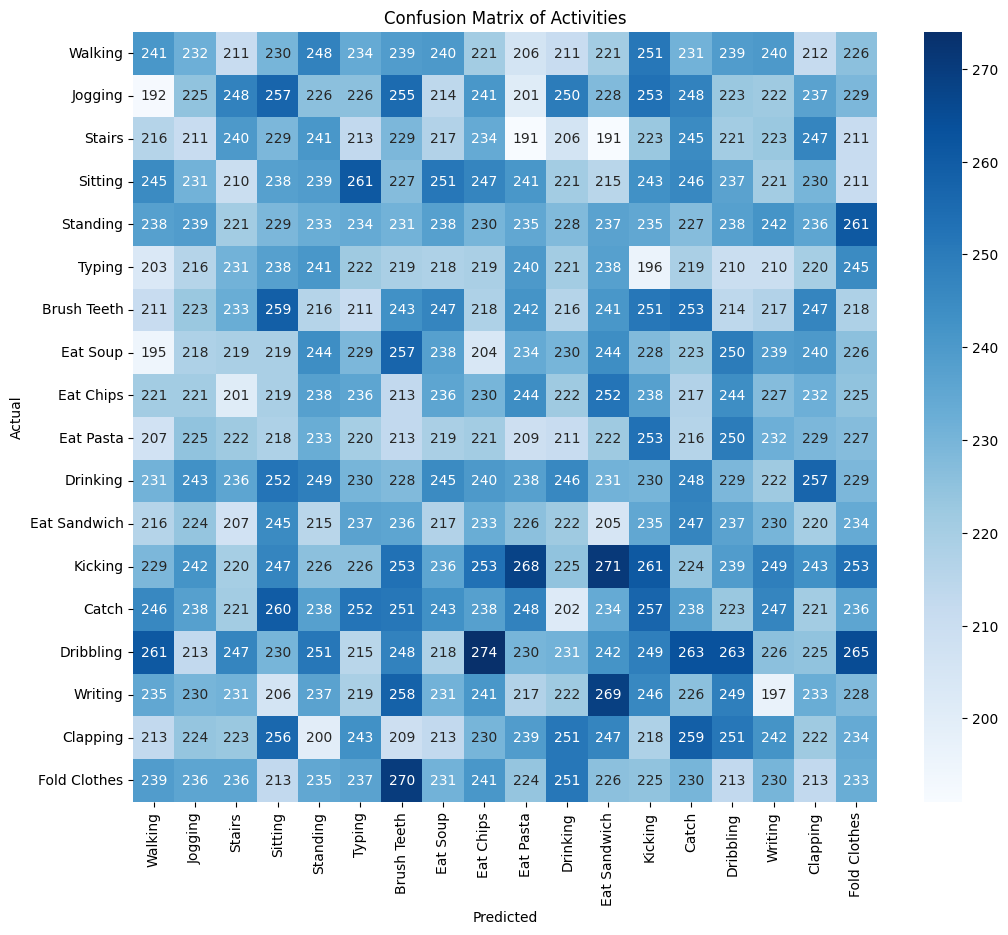

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(actual_actions, predicted_actions)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=activity_labels, yticklabels=activity_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Activities')
plt.show()


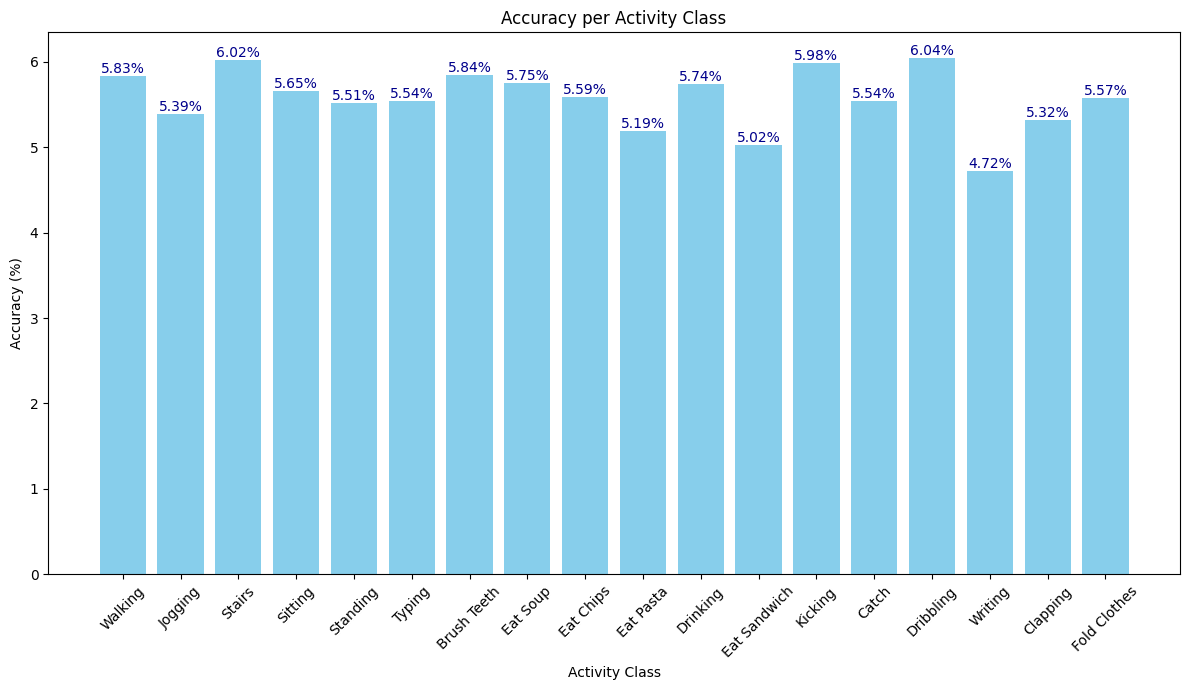

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'activity_labels' and 'class_accuracies' are defined
activities = activity_labels  # Use descriptive activity names for each class
accuracies = [acc * 100 for acc in class_accuracies]  # Convert accuracies to percentages

plt.figure(figsize=(12, 7))  # Set the figure size for better readability
bars = plt.bar(activities, accuracies, color='skyblue')  # Create a bar chart

# Adding labels on top of the bars
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom', color='darkblue')

plt.xlabel('Activity Class')  # Label for the x-axis
plt.ylabel('Accuracy (%)')  # Label for the y-axis
plt.title('Accuracy per Activity Class')  # Title of the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels
plt.show()  # Display the plot




### Key Components of the Visualization Code

1. **Setting Figure Size**:
   - `plt.figure(figsize=(12, 7))`: Specifies the dimensions of the figure. A larger figure size helps in clearly visualizing more data points or detailed labels.

2. **Creating the Bar Chart**:
   - `plt.bar(...)`: This function creates a bar chart. Here, `activities` represent the categories on the x-axis, and `accuracies` are the values for each category. The color 'skyblue' is chosen for the bars to enhance aesthetic appeal.

3. **Adding Text Labels to Bars**:
   - Within the loop `for bar in bars:`, each bar's height is fetched using `bar.get_height()`, and a text label displaying the accuracy percentage is positioned above the bar. `plt.text(...)` positions the text based on the bar's x-position, its width, and its height. The alignment settings `ha='center'` and `va='bottom'` ensure that the text is centered horizontally and aligned at the top of the bar vertically. The color 'darkblue' is chosen for the text for readability against the light bar color.

4. **Axes Labels and Title**:
   - `plt.xlabel('Activity Class')` and `plt.ylabel('Accuracy (%)')`: These commands label the x-axis and y-axis, clarifying what each axis represents.
   - `plt.title('Accuracy per Activity Class')`: Sets a title for the chart, summarizing what the visualization represents.

5. **Adjustments and Display**:
   - `plt.xticks(rotation=45)`: Rotates the labels on the x-axis by 45 degrees to prevent overlapping text, especially useful when labels are long or numerous.
   - `plt.tight_layout()`: Automatically adjusts subplot parameters to give the plot elements (like labels and title) sufficient room.
   - `plt.show()`: Renders the plot. In a scripting environment, this command is essential to display the figure window.


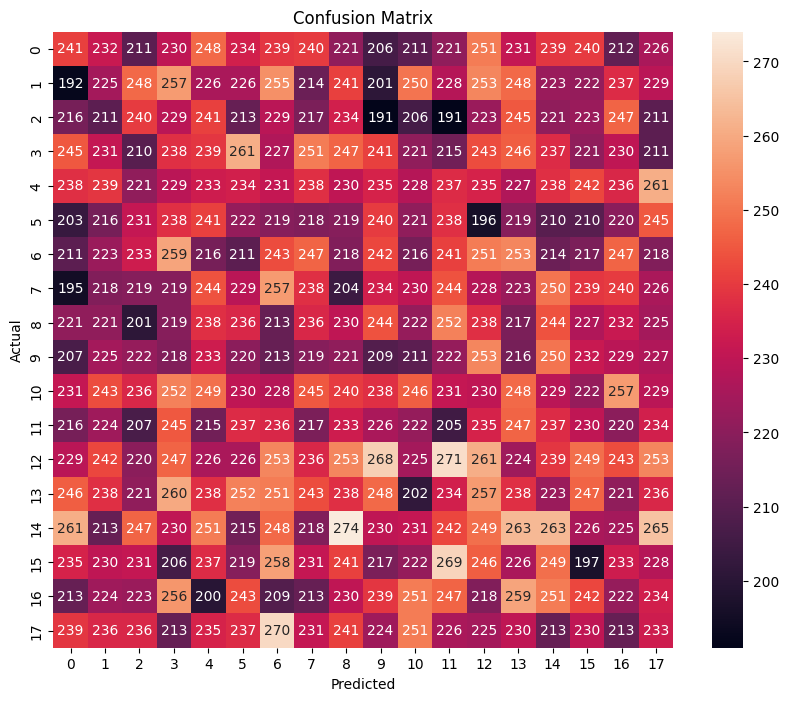

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(actual_actions, predicted_actions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



### Conclusion

The analysis of the classification model's performance across various activity classes has provided insightful data on the efficacy and limitations of the predictive capabilities of our Q-learning model. The use of a confusion matrix and class accuracy visualizations helped us identify how uniformly the model performs across different activities and highlighted specific areas where the model may be underperforming.

We observed that while the overall model accuracy provides a broad measure of effectiveness, the class-specific accuracies, illustrated through the bar chart, revealed disparities in model performance across different activities. Some classes achieved higher accuracy, potentially due to more distinctive features or sufficient training examples, while others, with lower accuracies, might suffer from a lack of distinct features or insufficient representation in the training data.

### Discussion

#### Model Strengths:
- **General Performance**: The model demonstrates a capable foundation for recognizing various activities, proving that the Q-learning approach is viable for this type of classification task.
- **Visualization and Analysis Tools**: The methodologies employed for analyzing the model's performance, including confusion matrices and accuracy visualizations, have provided clear insights into the model's behavior, facilitating targeted improvements.

#### Areas for Improvement:
- **Data Imbalance**: Classes with lower accuracies could be suffering from imbalanced data distribution. Addressing this through techniques such as SMOTE, upsampling, or gathering more data could improve model performance.
- **Feature Engineering**: Enhancing feature extraction could lead to significant improvements. Investigating additional features or applying more complex data transformations might capture better distinctions between activities.
- **Hyperparameter Tuning**: Adjusting learning parameters such as the learning rate (alpha), discount factor (gamma), and exploration rate (epsilon) could optimize the learning process and improve accuracy.
- **Advanced Model Architectures**: Incorporating more sophisticated machine learning or deep learning models might improve the ability to capture complex patterns in the data, especially for activities that are currently underpredicted.

#### Future Directions:
- **Experimentation with Ensemble Techniques**: Combining predictions from multiple models could reduce variance and bias, leading to more robust overall performance.
- **Longitudinal Study**: A longitudinal analysis to monitor the model’s performance over time, especially as more data becomes available or as activities evolve, would be beneficial.
- **Deployment and Real-time Testing**: Deploying the model in a real-world environment and performing real-time testing could provide additional insights and data points for further refinement and calibration of the model.

### Conclusion

This analysis has underscored the importance of continuous monitoring and iterative improvement in machine learning projects. The insights gained from the detailed evaluation not only highlight the immediate areas for enhancement but also set the stage for strategic planning in future development phases. As we refine the model and adapt to new data, our approach will remain focused on enhancing accuracy, ensuring fairness, and maximizing the practical utility of the predictive model in real-world applications.